In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [5]:
from google.colab import files
uploaded = files.upload()


Saving customer_analysis_cleaned - marketing_campaign.csv to customer_analysis_cleaned - marketing_campaign.csv


In [6]:
df = pd.read_csv('customer_analysis_cleaned - marketing_campaign.csv')  # or your cleaned dataset



In [13]:
df['Income'] = df['Income'].replace('[\$,]', '', regex=True).astype(float)
df['Total Spent'] = df['Income'].replace('[\$,]', '', regex=True).astype(float)

In [17]:
features = df[['Age', 'Income', 'Total Spent', 'Recency', 'Total Campaign Response', 'Children']]
features_clean = features.dropna()

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_clean)

kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

In [26]:
df_clean = df.loc[features_clean.index].copy()  # Make sure it's a copy to avoid assignment errors
df_clean['Cluster'] = cluster_labels

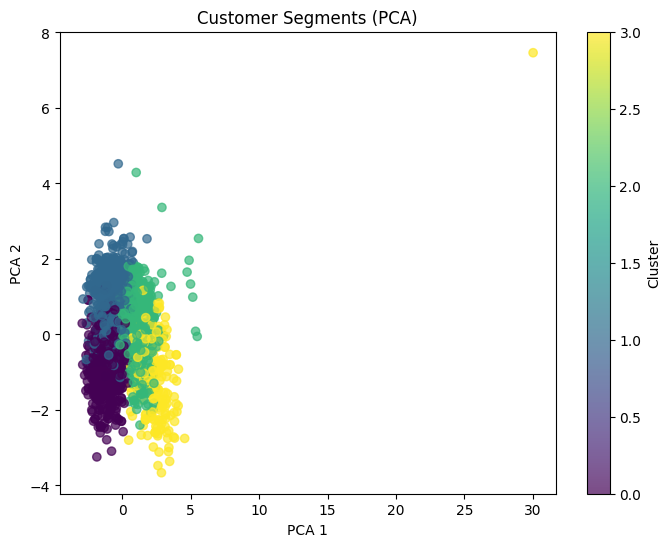

In [27]:
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(components[:, 0], components[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.title('Customer Segments (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()

In [29]:
df_clean.groupby('Cluster')[['Age', 'Income', 'Total Spent', 'Recency', 'Total Campaign Response', 'Children']].mean().round(1)


,Age,Income,Total Spent,Recency,Total Campaign Response,Children
Cluster,,,,,,
0,49.6,33065.0,33065.0,29.8,0.3,1.1
1,59.1,43879.3,43879.3,72.2,0.1,1.5
2,59.7,70805.4,70805.4,45.8,0.3,0.5
3,55.7,80040.7,80040.7,43.7,2.8,0.3


In [30]:
df_clean['Cluster'].value_counts().sort_index()


,count
Cluster,
0,652
1,680
2,690
3,194


In [31]:
df_clean.to_csv('customer_segments.csv', index=False)

In [32]:
from google.colab import files
files.download('customer_segments.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>